## ИМПОРТИРУЕМ НУЖНЫЕ БИБЛИОТЕКИ

- `numpy`: помогает работать с числами и делать математические вычисления.
- `matplotlib`: создание графиков и диаграм
- `pandas`: работа с табличными данными
- `seaborn`: визуализация

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Читаем .csv файл

In [30]:
df = pd.read_csv('Dannye_o_kreditnoy_istorii_klientov.csv')

## АНАЛИЗ ДАТАСЕТА
- С помощью .sample получаем рандомный набор строк из датасета, смотрим, что в нем лежит
- Замечаем странные значения в следующих столбцах: checking_status, savings_status, other_parties, other_payment_plans, own_telephone
- Далее изучим, насколько хранящаяся в них информация полезна для нас

In [31]:
df.sample(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
261,<0,24.0,existing paid,radio/tv,1603.0,<100,>=7,4.0,female div/dep/mar,none,...,car,55.0,none,own,1.0,skilled,1.0,none,yes,good
708,0<=X<200,9.0,existing paid,radio/tv,1206.0,<100,>=7,4.0,female div/dep/mar,none,...,real estate,25.0,none,own,1.0,skilled,1.0,none,yes,good
779,0<=X<200,18.0,existing paid,repairs,3872.0,<100,unemployed,2.0,female div/dep/mar,none,...,car,67.0,none,own,1.0,skilled,1.0,yes,yes,good
422,0<=X<200,12.0,critical/other existing credit,new car,958.0,<100,4<=X<7,2.0,male single,none,...,real estate,47.0,none,own,2.0,unskilled resident,2.0,none,yes,good
404,0<=X<200,18.0,delayed previously,new car,2899.0,no known savings,>=7,4.0,male single,none,...,car,43.0,none,own,1.0,skilled,2.0,none,yes,good
551,no checking,6.0,all paid,radio/tv,1750.0,500<=X<1000,>=7,2.0,male single,none,...,life insurance,45.0,bank,own,1.0,unskilled resident,2.0,none,yes,good
166,<0,18.0,existing paid,furniture/equipment,1131.0,<100,unemployed,4.0,female div/dep/mar,none,...,car,33.0,none,own,1.0,skilled,1.0,none,yes,bad
177,<0,6.0,critical/other existing credit,radio/tv,338.0,500<=X<1000,>=7,4.0,male single,none,...,car,52.0,none,own,2.0,skilled,1.0,none,yes,good
187,0<=X<200,16.0,critical/other existing credit,new car,1175.0,<100,unemployed,2.0,male single,none,...,car,68.0,none,for free,3.0,unemp/unskilled non res,1.0,yes,yes,good
632,0<=X<200,15.0,existing paid,radio/tv,1444.0,no known savings,<1,4.0,male single,none,...,life insurance,23.0,none,own,1.0,skilled,1.0,none,yes,good


## В данном случае нас интересует значение no checking, оно имеет смысловую нагрузку и не несет в себе смысл NULL, поэтому его не изменяем

<Axes: >

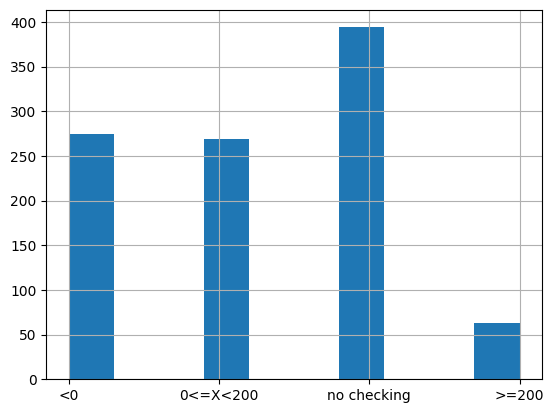

In [32]:
df.checking_status.hist()

## Здесь видим, что есть много значений no known savings, которые не несут в себе значения, скорее всего эти поля несут в себе смысл NULL

<Axes: >

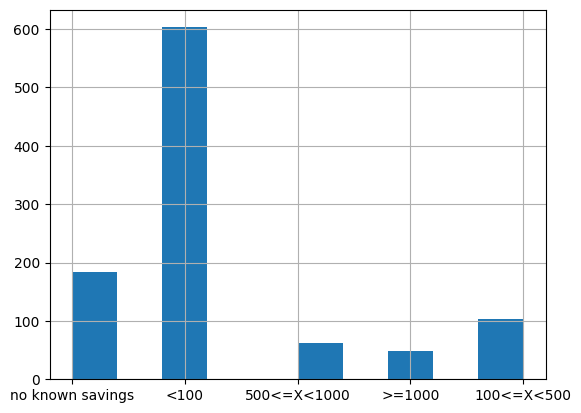

In [33]:
df.savings_status.hist()

## Здесь много значений null, но сравнительно много и полезных значений

<Axes: >

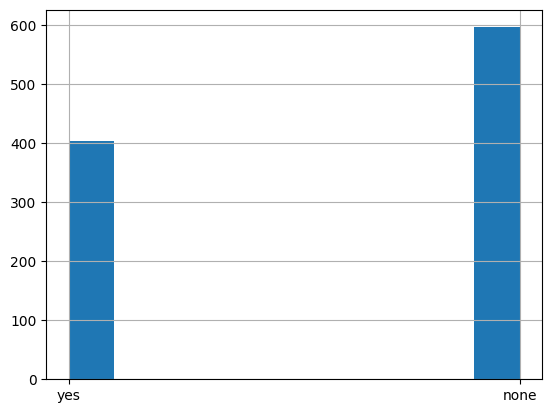

In [34]:
df.own_telephone.hist()

## Здесь наша гипотеза подтвердилась, большая часть заполнена none(мусорные NULL значения)

<Axes: >

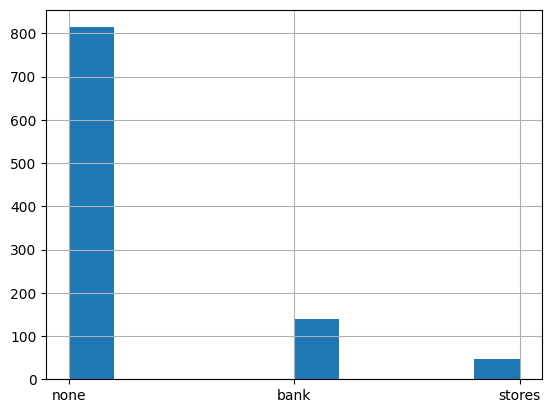

In [35]:
df.other_payment_plans.hist()

## Здесь наша гипотеза так же подтвердилась, большая часть заполнена none(мусорные NULL значения)

<Axes: >

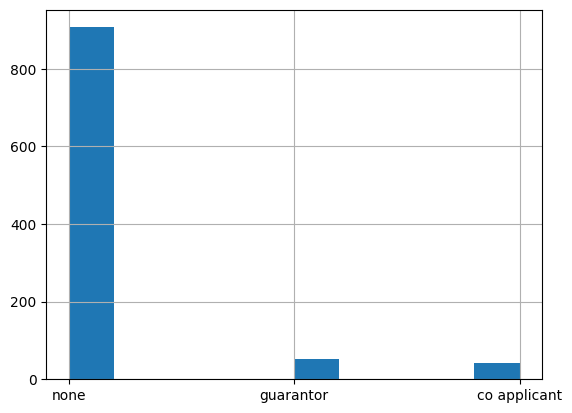

In [36]:
df.other_parties.hist()

## Посмотрим уникальные значения для каждого столбца, у которого мало уникальных значений, чтобы исключить пропуски в других данных

In [38]:
for clmn in df:
    if df[clmn].nunique() < 10:
        display(f"{clmn}: {df[clmn].unique()}")

"checking_status: ['<0' '0<=X<200' 'no checking' '>=200']"

"credit_history: ['critical/other existing credit' 'existing paid' 'delayed previously'\n 'no credits/all paid' 'all paid']"

"savings_status: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']"

"employment: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']"

'installment_commitment: [4. 2. 3. 1.]'

"personal_status: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']"

"other_parties: ['none' 'guarantor' 'co applicant']"

'residence_since: [4. 2. 3. 1.]'

"property_magnitude: ['real estate' 'life insurance' 'no known property' 'car']"

"other_payment_plans: ['none' 'bank' 'stores']"

"housing: ['own' 'for free' 'rent']"

'existing_credits: [2. 1. 3. 4.]'

"job: ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'\n 'unemp/unskilled non res']"

'num_dependents: [1. 2.]'

"own_telephone: ['yes' 'none']"

"foreign_worker: ['yes' 'no']"

"class: ['good' 'bad']"

## АНАЛИЗ МАТРИЦЫ КОРРЕЛЯЦИИ
- приведем категориальные данные к необходимому виду, чтобы посмотреть матрицу корреляции(heatmap()), используем seaborn
- смотрим матрицу для того, чтобы проверить, насколько данные в столбцах, содержащих странные значения, связаны с другими данными

interval columns not set, guessing: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']


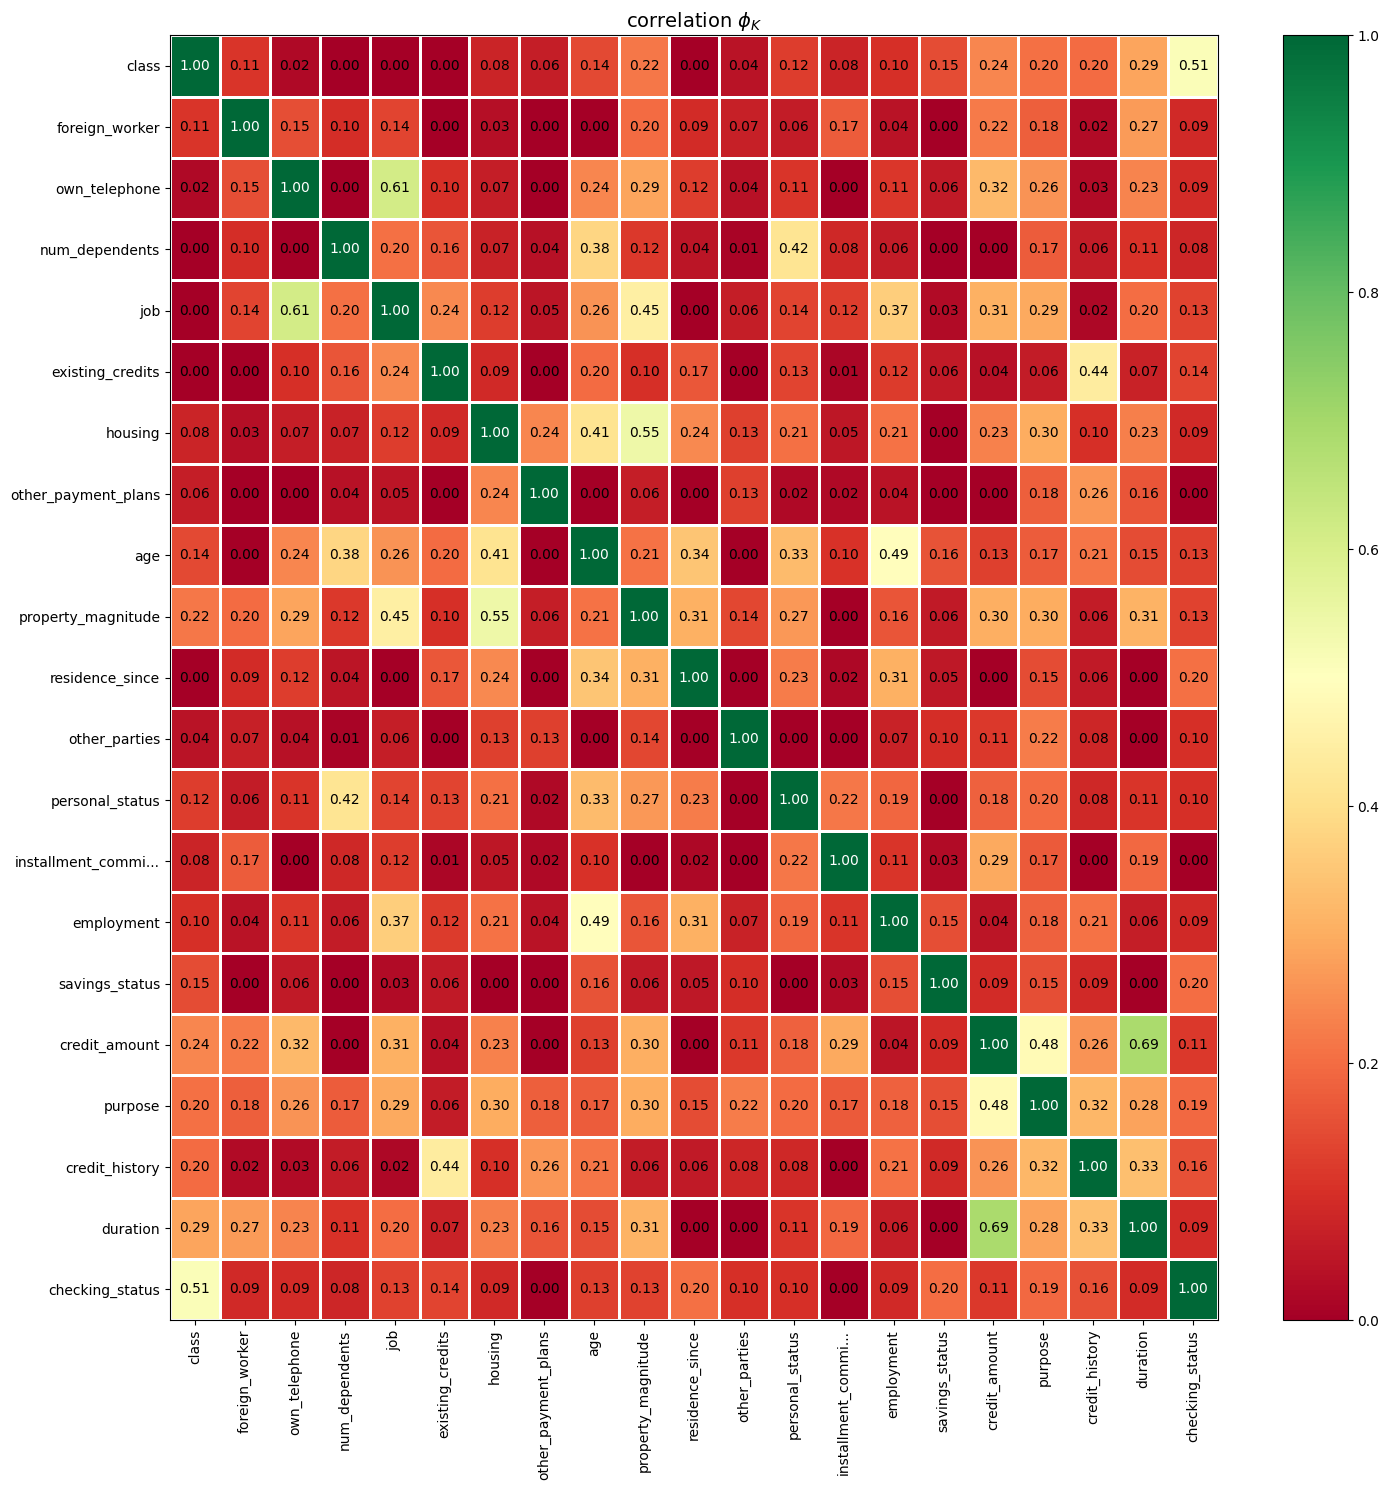

In [39]:
from phik.report import plot_correlation_matrix

df_factorized = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)
phik_overview = df_factorized.phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, vmin=0,
                        title=r'correlation $\phi_K$',
                        figsize=(15, 15))

- опираясь на матрицу корреляции можно сделать вывод, что other_parties и other_payment_plans почти не связаны с другими данными,
- либо коэффициент корреляции слишком мал -> мы можем удалить эти столбцы, так как информация не является важной/полезной для нас

## Cмотрим, что значения none и no known savings/no checking status не определяются как null-значения

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

## Проверяем датасет на наличие дубликатов

In [41]:
df.duplicated().sum()

0

## Смотрим частоту вхождения самых популярных значений для каждой колонки
## Транспонируем матрицу для удобства представления

In [42]:
df.describe(include='object').T

,count,unique,top,freq
checking_status,1000,4,no checking,394
credit_history,1000,5,existing paid,530
purpose,1000,10,radio/tv,280
savings_status,1000,5,<100,603
employment,1000,5,1<=X<4,339
personal_status,1000,4,male single,548
other_parties,1000,3,none,907
property_magnitude,1000,4,car,332
other_payment_plans,1000,3,none,814
housing,1000,3,own,713


## Мы убедились, что в other_parties и other_payment_plans большинство значений - null, они не связаны с другими колонками, можем смело их удалять,т.к. они не содержат важной информации

In [43]:
df = df.drop(columns=['other_parties', 'other_payment_plans'])

## Cмотрим датасет, мы удалили две колонки

In [44]:
df.describe(include='object').T

,count,unique,top,freq
checking_status,1000,4,no checking,394
credit_history,1000,5,existing paid,530
purpose,1000,10,radio/tv,280
savings_status,1000,5,<100,603
employment,1000,5,1<=X<4,339
personal_status,1000,4,male single,548
property_magnitude,1000,4,car,332
housing,1000,3,own,713
job,1000,4,skilled,630
own_telephone,1000,2,none,596


## В savings_status до сих пор много значений no known savings, нежелательно удалять ~200 строк, т.к. это существенная часть от выборки, нужно заменить эти значения

<Axes: >

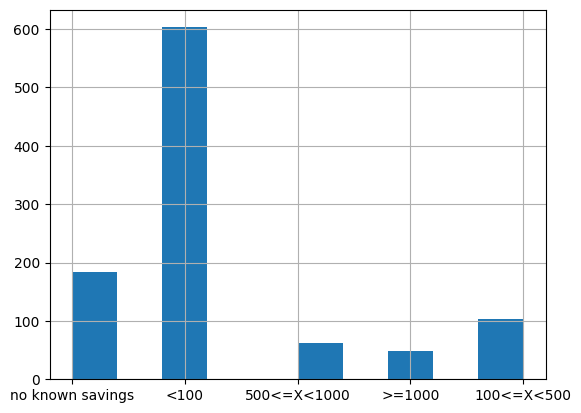

In [45]:
df.savings_status.hist()

## Опираясь на матрицу корреляции, выявляем другие связанные с savings_status колонки, смотрим, где встречается no known savings

In [46]:
df[['checking_status', 'purpose', 'class', 'savings_status']][df.savings_status == 'no known savings']

,checking_status,purpose,class,savings_status
0,<0,radio/tv,good,no known savings
5,no checking,education,good,no known savings
16,no checking,radio/tv,good,no known savings
17,<0,business,good,no known savings
24,no checking,furniture/equipment,good,no known savings
...,...,...,...,...
968,no checking,radio/tv,good,no known savings
977,0<=X<200,business,good,no known savings
990,no checking,education,good,no known savings
992,<0,radio/tv,good,no known savings


## Построение графиков зависимостей данных между собой

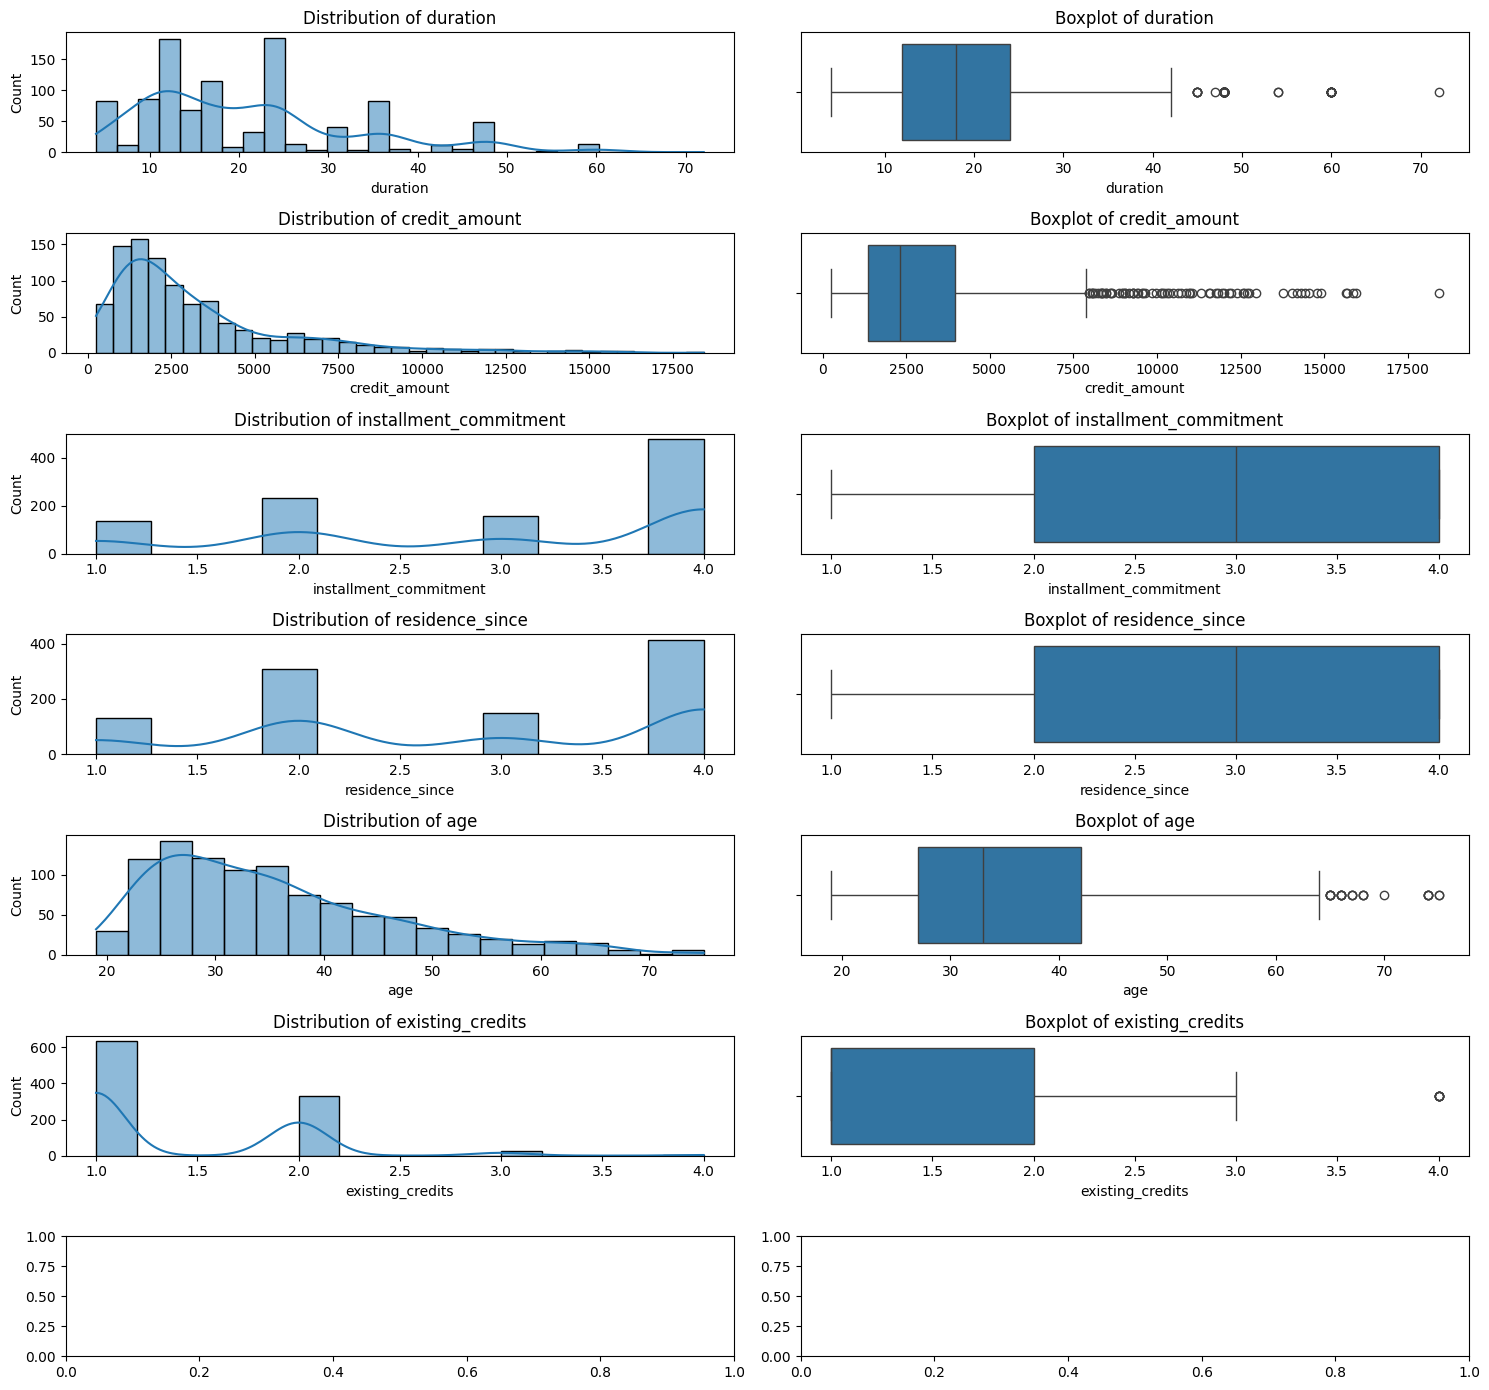

In [47]:
numeric_data = df.select_dtypes(exclude='object')

# Создание фигуры с подграфиками: количество строк соответствует числу числовых столбцов,
# в каждой строке два столбца подграфиков.
fig, axes = plt.subplots(nrows=len(numeric_data.columns), ncols=2,
                         figsize=(15, 2 * len(numeric_data.columns)))

# Проход по всем числовым столбцам, кроме последнего
for i, col in enumerate(numeric_data.columns[:-1]):
    # Гистограмма с наложением графика плотности для каждого столбца
    sns.histplot(data=numeric_data, x=col, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')  # Установка заголовка для гистограммы

    # Boxplot для каждого столбца
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')  # Установка заголовка для boxplot

# Настройка размещения подграфиков, чтобы избежать перекрытия
plt.tight_layout()

# Отображение всех графиков
plt.show()

## Замена "мусорных" значений с помощью маски

In [62]:
#учитывая то, что зависимость между данными действительно есть, создаем маску и для всех строк, где значения в соответствующих колонках совпадают, устанавливаем одинаковое значение savings_status
mask = df['savings_status'] == 'no known savings'

for index, row in df[mask].iterrows():
    # Найдем первую строку, где checking_status, class и purpose совпадают
    match = df[(df['checking_status'] == row['checking_status']) & 
               (df['class'] == row['class']) & 
               (df['purpose'] == row['purpose']) & 
               (df['savings_status'] != 'no known savings')]

    if not match.empty:
        # Заменим значение savings_status
        df.at[index, 'savings_status'] = match.iloc[0]['savings_status']

## Измененный датафрейм:

In [50]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,500<=X<1000,>=7,4.0,male single,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,4.0,real estate,31.0,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,4.0,life insurance,40.0,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,4.0,car,38.0,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,4.0,no known property,23.0,for free,1.0,skilled,1.0,yes,yes,bad


## После произведенных подстановок видим, что no known savings почти не осталось

<Axes: >

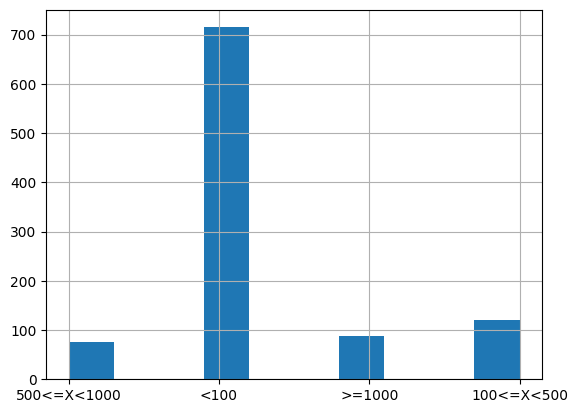

In [64]:
df.savings_status.hist()

## Со значением no known savings осталась только одна запись, одной записью мы можем принебречь

In [65]:
df.savings_status.value_counts()

savings_status
<100           715
100<=X<500     121
>=1000          88
500<=X<1000     75
Name: count, dtype: int64

## Убираем всю строку, где есть no known savings

In [66]:
df = df[df["savings_status"].str.contains("no known savings") == False]
df.savings_status.value_counts()

savings_status
<100           715
100<=X<500     121
>=1000          88
500<=X<1000     75
Name: count, dtype: int64

## Гистограмма измененной колонки savings_status

<Axes: >

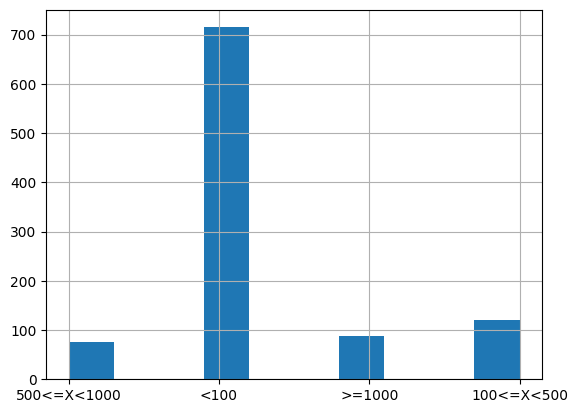

In [67]:
df.savings_status.hist()

## Подготовка данных для анализа корреляций

- Развернем матрицу коэффициентов корреляции, чтобы получить ее в формате длинной таблицы:


In [68]:
phik_long = phik_overview.unstack().reset_index()
#Удалим строки, где переменные совпадают, так как нам не интересны корреляции переменной с самой собой:
phik_long.columns = ['var1', 'var2', 'phik']

phik_long = phik_long[phik_long['var1'] != phik_long['var2']]

#Удалим дубликаты, чтобы каждая пара переменных была представлена только один раз:
phik_long = phik_long.drop_duplicates(subset=['phik'])

#Отсортируем данные по значению коэффициента корреляции phik в порядке убывания, чтобы выявить самые значимые корреляции:
phik_long = phik_long.sort_values(by='phik', ascending=False)

## phik_long — DataFrame, содержащий пары переменных и их коэффициенты корреляции, развернутый из матрицы коэффициентов корреляции.

In [69]:
phik_long

,var1,var2,phik
25,duration,credit_amount,0.688622
354,job,own_telephone,0.610783
245,property_magnitude,housing,0.545901
20,checking_status,class,0.512074
138,employment,age,0.494075
...,...,...,...
58,credit_history,job,0.017631
157,installment_commitment,residence_since,0.016879
162,installment_commitment,existing_credits,0.013670
206,other_parties,num_dependents,0.010523


## Визуализация топ-7 корреляций
- Определим количество топовых корреляций для анализа, для этого создадим функцию:

In [57]:
top_n = 7
top_pairs = phik_long.head(top_n)

def plot_top_correlations(df, top_pairs):
    for _, row in top_pairs.iterrows():
        var1, var2 = row['var1'], row['var2']
        try:
            if df[var1].dtype == 'object' and df[var2].dtype == 'object':
                crosstab = pd.crosstab(df[var1], df[var2])
                crosstab.plot(kind='bar', stacked=True, figsize=(15, 6))
                plt.title(f'Stacked crosstab for {var1} and {var2} ($\phi_K$ {row["phik"]:.2f})')
                plt.xlabel(var1)
                plt.ylabel(var2)
                plt.show()
            elif df[var1].dtype == 'object' or df[var2].dtype == 'object':
                cat_var = var1 if df[var1].dtype == 'object' else var2
                num_var = var2 if df[var2].dtype != 'object' else var1
                plt.figure(figsize=(15, 6))
                sns.boxplot(data=df, x=cat_var, y=num_var)
                plt.title(f'Box plot for {cat_var} and {num_var} ($\phi_K$ {row["phik"]:.2f})')
                plt.xlabel(var1)
                plt.ylabel(var2)
                plt.show()
            else:
                plt.figure(figsize=(15, 6))
                sns.regplot(data=df, x=var1, y=var2, line_kws={'color' : 'red'}, lowess=True)
                plt.title(f'Scatter plot for {var1} and {var2} ($\phi_K$ {row["phik"]:.2f})')
                plt.xlabel(var1)
                plt.ylabel(var2)
                plt.show()
        except Exception as e:
            print(f'skip plot; exception:{e}')               

## Вызов функции

skip plot; exception:`lowess=True` requires statsmodels, an optional dependency, to be installed.


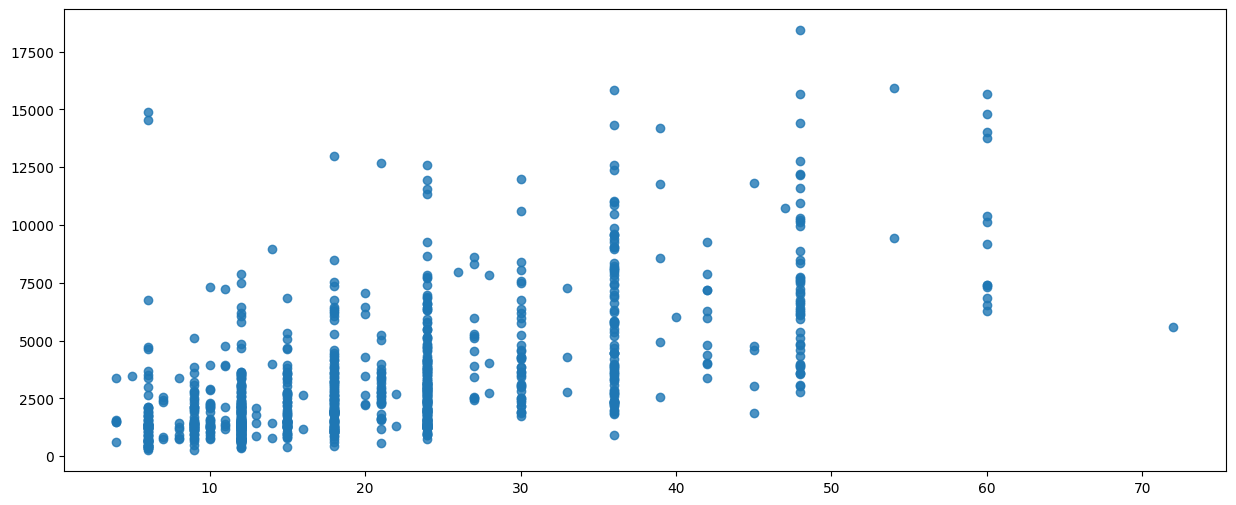

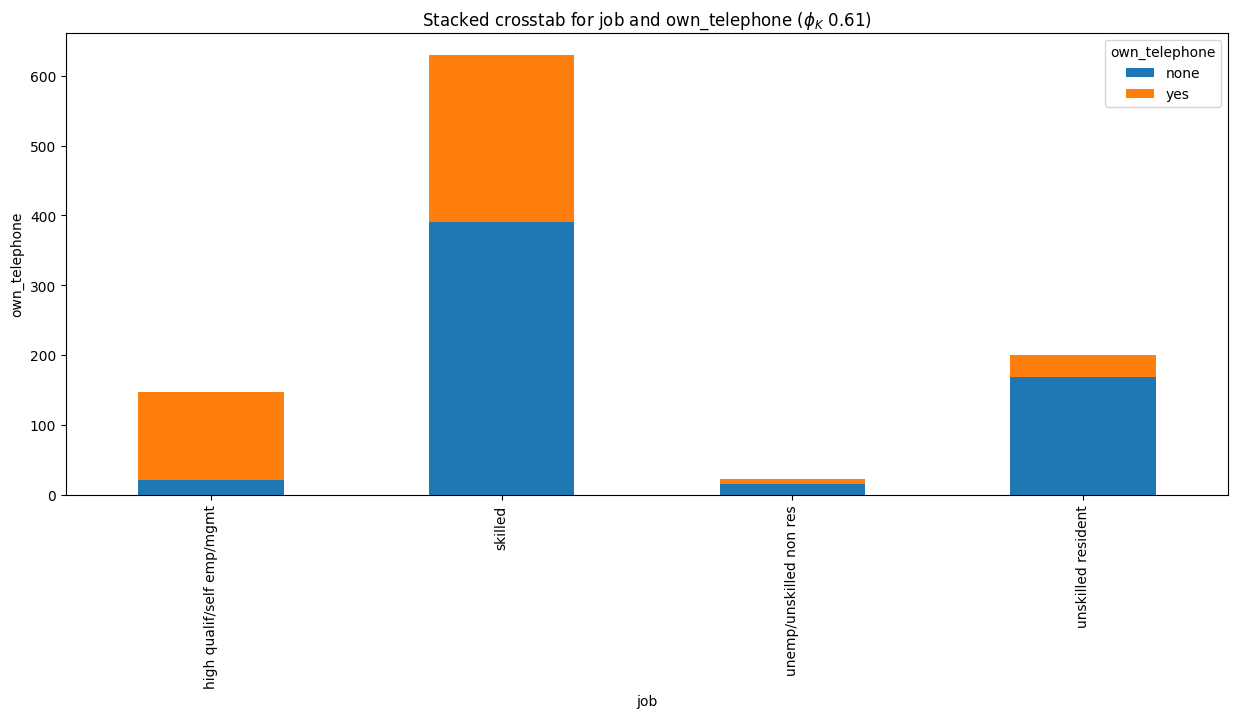

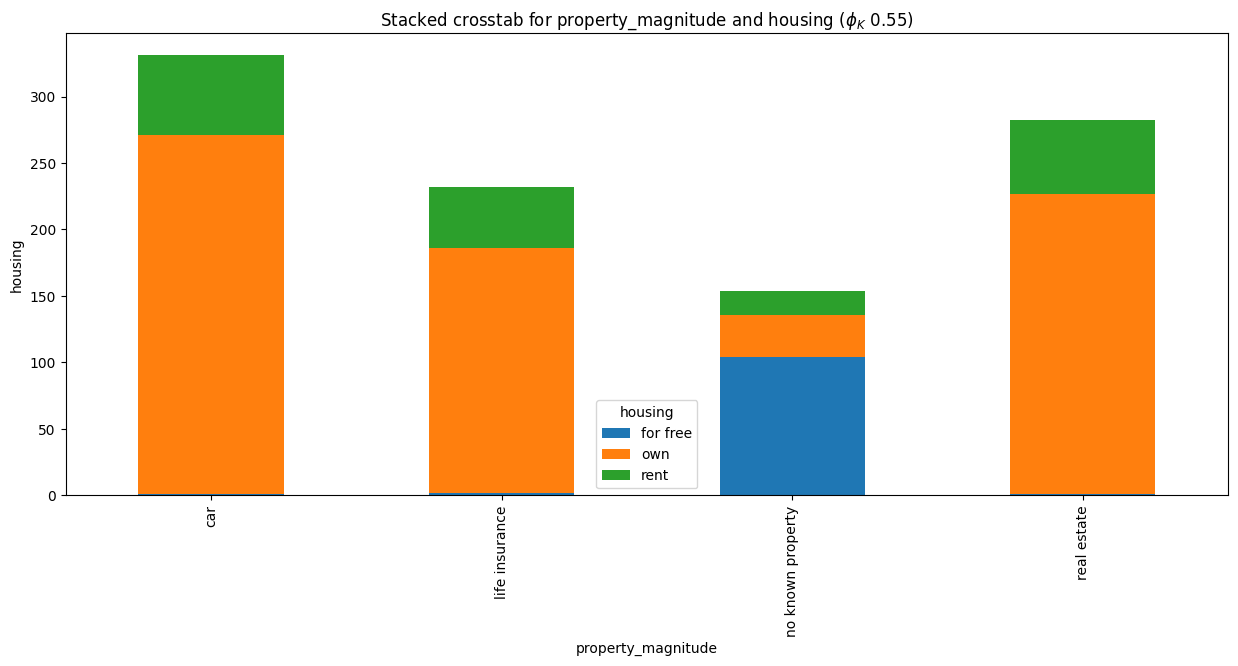

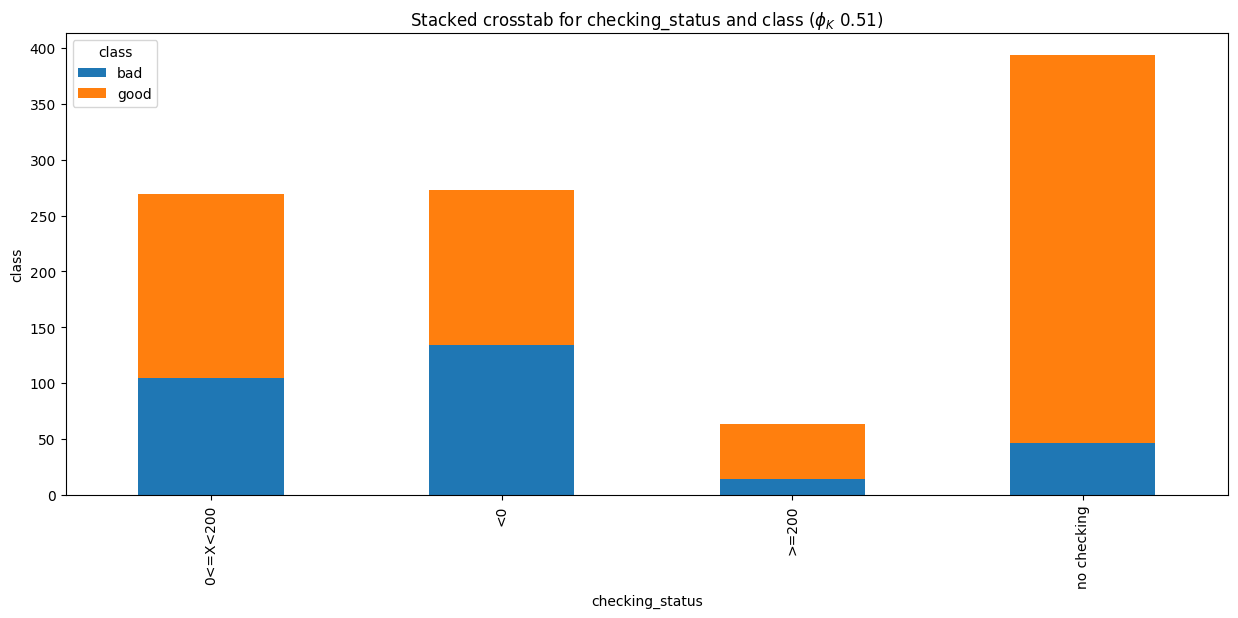

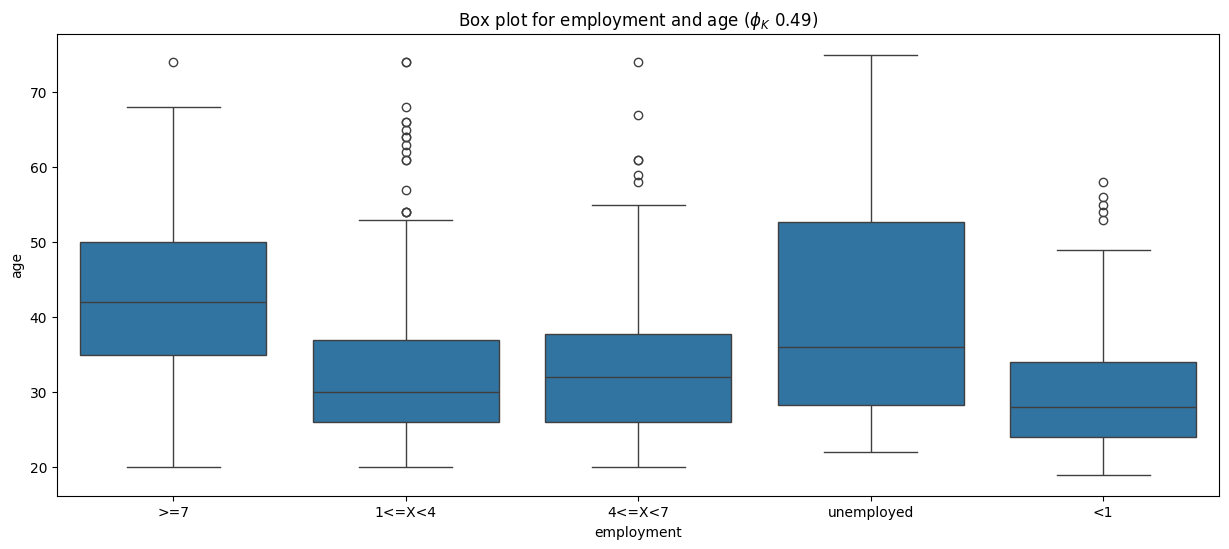

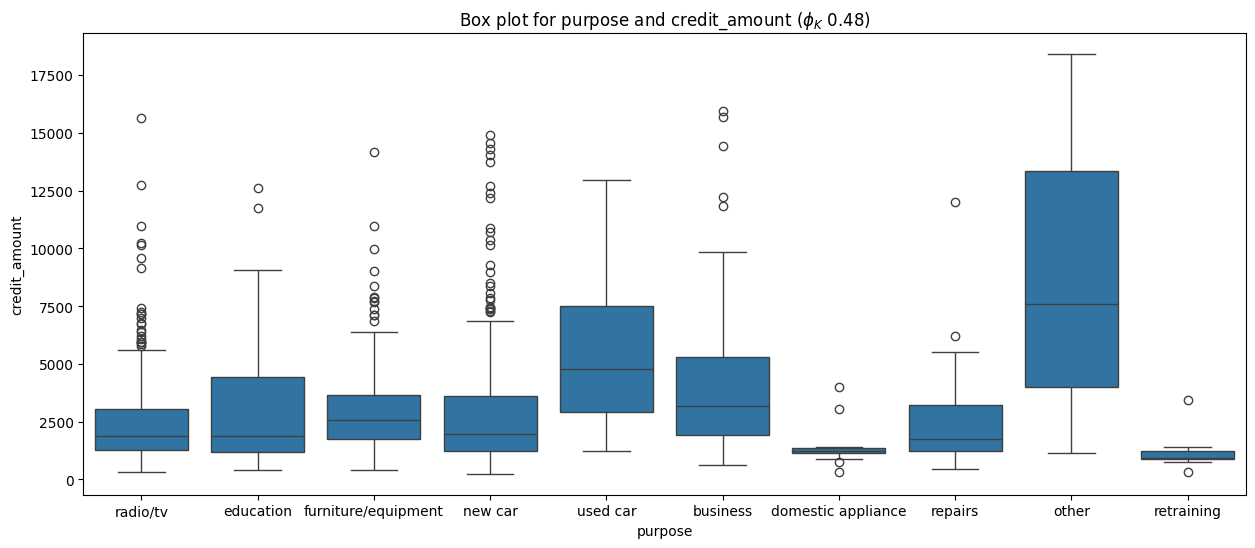

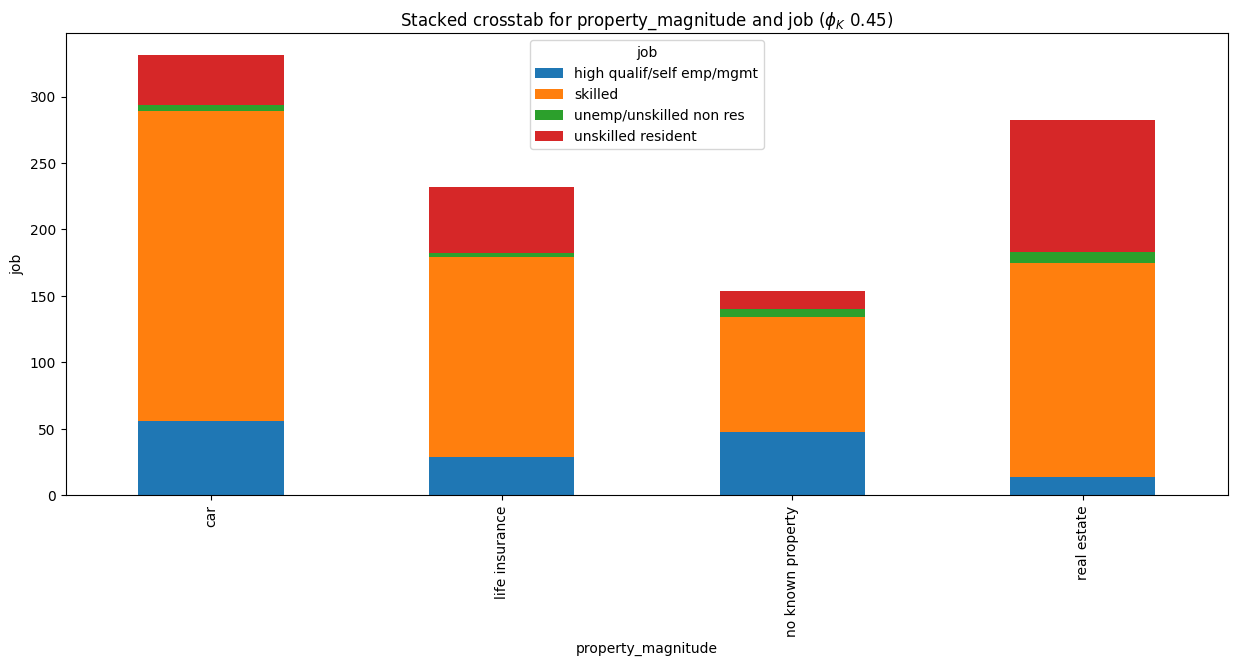

In [58]:
plot_top_correlations(df, top_pairs)

## Проанализировав второй график, можем увидеть зависимость:
- У unskilled resident чаще встречается значение none в колонке own_telephone, что логически оправдано:
- Более высококвалифицированные клиенты - более ответственные, в процентном соотношении намного чаще вносят данные о своем телефоне, следовательно, это не мусорные данные, их не нужно удалять, так как они несут полезную информацию для нас. 

## Приведение типов
- для приведения типов еще раз обратимся к сэмплу
- мы точно можем привести к INT64 значениям age, existing_credits, num_dependents и residence_since

In [59]:
df.sample(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
700,no checking,12.0,existing paid,furniture/equipment,1123.0,500<=X<1000,1<=X<4,4.0,female div/dep/mar,4.0,car,29.0,rent,1.0,unskilled resident,1.0,none,yes,bad
282,>=200,18.0,all paid,radio/tv,1445.0,>=1000,4<=X<7,4.0,male single,4.0,car,49.0,own,1.0,unskilled resident,1.0,none,yes,good
86,0<=X<200,18.0,critical/other existing credit,furniture/equipment,1295.0,<100,<1,4.0,female div/dep/mar,1.0,life insurance,27.0,own,2.0,skilled,1.0,none,yes,good
824,no checking,18.0,critical/other existing credit,furniture/equipment,3780.0,<100,<1,3.0,male div/sep,2.0,car,35.0,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes,good
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
706,0<=X<200,48.0,existing paid,new car,6560.0,100<=X<500,4<=X<7,3.0,male single,2.0,life insurance,24.0,own,1.0,skilled,1.0,none,yes,bad
870,no checking,36.0,delayed previously,furniture/equipment,7678.0,500<=X<1000,4<=X<7,2.0,female div/dep/mar,4.0,car,40.0,own,2.0,skilled,1.0,yes,yes,good
725,no checking,6.0,critical/other existing credit,new car,250.0,>=1000,1<=X<4,2.0,female div/dep/mar,2.0,real estate,41.0,own,2.0,unskilled resident,1.0,none,yes,good
543,>=200,18.0,existing paid,furniture/equipment,2864.0,<100,1<=X<4,2.0,male single,1.0,real estate,34.0,own,1.0,unskilled resident,2.0,none,yes,bad
651,0<=X<200,12.0,existing paid,furniture/equipment,1922.0,<100,1<=X<4,4.0,male single,2.0,life insurance,37.0,own,1.0,unskilled resident,1.0,none,yes,bad


## Приводим к INT64

In [60]:
df['age'] = df['age'].astype('int64')
df['existing_credits'] = df['existing_credits'].astype('int64')
df['num_dependents'] = df['num_dependents'].astype('int64')
df['residence_since'] = df['residence_since'].astype('int64')

/var/folders/vr/pwcjk8k518l_y1csjntb5vlc0000gn/T/ipykernel_54612/3583968545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype('int64')
/var/folders/vr/pwcjk8k518l_y1csjntb5vlc0000gn/T/ipykernel_54612/3583968545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['existing_credits'] = df['existing_credits'].astype('int64')
/var/folders/vr/pwcjk8k518l_y1csjntb5vlc0000gn/T/ipykernel_54612/3583968545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

## Теперь мусорные данные убраны, нужные колонки приведены к подходящему типу

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         999 non-null    object 
 1   duration                999 non-null    float64
 2   credit_history          999 non-null    object 
 3   purpose                 999 non-null    object 
 4   credit_amount           999 non-null    float64
 5   savings_status          999 non-null    object 
 6   employment              999 non-null    object 
 7   installment_commitment  999 non-null    float64
 8   personal_status         999 non-null    object 
 9   residence_since         999 non-null    int64  
 10  property_magnitude      999 non-null    object 
 11  age                     999 non-null    int64  
 12  housing                 999 non-null    object 
 13  existing_credits        999 non-null    int64  
 14  job                     999 non-null    object 

## ВЫВОДЫ:

- Мы проанализировали датасет, определили данные, которые нужно изменить/удалить
- Проанализировали корреляцию данных между собой, чтобы вносить изменения
- Провели исследование для оставшихся "подозрительных колонок", чтобы принять решение: являются данные полезными или нет
- Привели оставшиеся данные к корректным данным
> Таким образом, мы подготовили датасет для дальнейшей работы с ним